In [14]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import clmm
import numpy as np

from descwl_shear_sims.galaxies import make_galaxy_catalog
from descwl_shear_sims.galaxies import WLDeblendGalaxyCatalog
from descwl_shear_sims.psfs import make_fixed_psf
from descwl_shear_sims.surveys import get_survey

from descwl_shear_sims.sim import make_sim
from descwl_shear_sims.shear import ShearNFW


import matplotlib.pyplot as plt


cosmo = clmm.Cosmology(H0=70.0, Omega_dm0=0.27 - 0.045, Omega_b0=0.045, Omega_k0=0.0)
halo = clmm.Modeling(massdef="mean", delta_mdef=200, halo_profile_model="nfw")
halo.set_cosmo(cosmo)
halo.set_concentration(4)
halo.set_mass(1.0e15)
z_cl = 1.0
# source properties
z_source = 2.0  # all sources in the same plane

shear_obj = ShearNFW(halo, z_cl)

seed = 74321
rng = np.random.RandomState(seed)

coadd_dim = 50
se_dim = 50
psf_dim = 41

galaxy_catalog = WLDeblendGalaxyCatalog(
    rng=rng,
    coadd_dim=coadd_dim,
    buff=2,
    layout="random_disk",
)
psf = make_fixed_psf(psf_type="gauss")
band_list = ["r"]

sim_data = make_sim(
    rng=rng,
    galaxy_catalog=galaxy_catalog,
    coadd_dim=coadd_dim,
    shear_obj=shear_obj,
    psf=psf,
    noise_factor=0.0,
    bands=band_list,
)

In [17]:
exp = sim_data["band_data"]["r"][0]
img = exp.getImage().getArray()

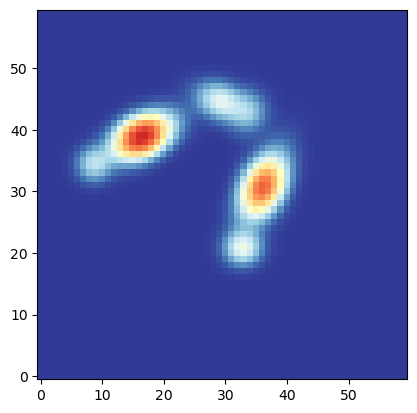

In [21]:
from astropy.visualization import simple_norm
plt.imshow(img,aspect='equal',cmap='RdYlBu_r',origin='lower',interpolation='None',\
             norm=simple_norm(img,'asinh',asinh_a=0.1,min_cut=-0.01,max_cut=4))